<a href="https://colab.research.google.com/github/B3aRrrr/M8LabsAndHomeworks/blob/main/ML_FirstLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
from sklearn import linear_model
import sympy as sy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

from typing import Tuple,Mapping

import seaborn

import pandas as pd

In [189]:
#17-09-2022

x,y = sy.symbols('x  y')

# Функции от двух переменных (на выбор)
distFunc = {
    "Rastrigin":10*2 + sum(t**2  - 10 * sy.cos(2*sy.pi*t) for t in [x,y]),
    "Bill" : (1.5 - x + x*y)**2 + (2.25 - x  + x*y**2)**2 + (2.625 - x + x*y**3)**2
}

# конкретная функция расчет
def myFuncSym(name:str):
     return distFunc[name]

# Название функции
name = "Bill"

# Объявление функций и градиентов по направлениям
syF = myFuncSym(name)
myDiffFuncSymX = sy.diff(syF,x)
myDiffFuncSymY = sy.diff(syF,y)

# print(syF)
# print(myDiffFuncSymX)
# print(myDiffFuncSymY)

# Python-функции на основе объявленных
myFunc = sy.lambdify((x,y),syF,"numpy")
diffX = sy.lambdify((x,y),myDiffFuncSymX,"numpy")
diffY = sy.lambdify((x,y),myDiffFuncSymY,"numpy")

In [188]:
def GD (f:Mapping,x0:np.ndarray,y0:np.ndarray,df:list,lR:float=0.01,numberOfEpochs=100):
    """Моя реализация градиентного спуска
      f -  функия оптимизации
      df  - градиент оптимизируемого функционала
      point0  - стартовая точка shape=(1,2)
      lr - скорость обучения (0.01)
      path - пройденный путь

      (x_optimal,f(x_optimal))
    """
    path = np.concatenate((x0,y0))[np.newaxis,:]

    print(path,path.shape)
    x_old = x0.copy()
    y_old = y0.copy()

    difX = df[0]
    difY = df[1]
    t= 0
    for  i in range(numberOfEpochs):
      t += 1
      dx, dy = difX(x_old,y_old) , difY(x_old,y_old)#  получаем градиент по двум направлениям

      x_new = x_old - lR*dx # делаем шаг по X
      y_new = y_old - lR*dy # делаем шаг по Y

      x_old = x_new
      y_old = y_new
      
      path = np.concatenate((path,np.concatenate((x_new,y_new))[np.newaxis,:]))
    print(t)
    return path

[[-4.45209846 -4.49926175]] (1, 2)
5000


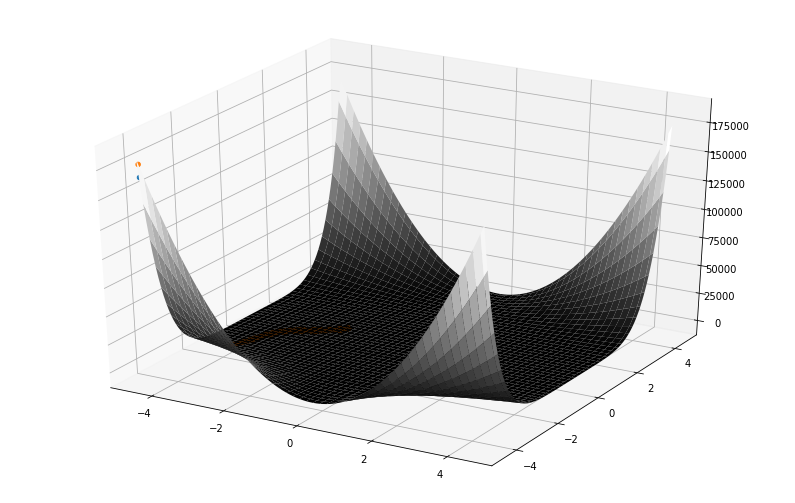

In [192]:
x = np.outer(np.linspace(-4.5, 4.5, 100), np.ones(100))
y = x.T
z = myFunc(x,y)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z, cmap='gist_gray')


#start point
x0 = np.random.uniform(-4.5,-4.4,size=(1,))
y0 = np.random.uniform(-4.5,-4.4,size=(1,))

#GD-path
path = GD(
    f=myFunc,
    x0=x0,
    y0=y0,
    lR=1e-5,
    numberOfEpochs=5000,
    df=[diffX,diffY]
)

xScat = path[:,0]
yScat = path[:,1] 

xScat = xScat.reshape((len(xScat),))
yScat = yScat.reshape((len(yScat),))


ax.scatter(x0, y0, myFunc(x0,x0),cmap='seismic')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html - colors
ax.scatter(xScat, yScat, myFunc(xScat,yScat),cmap='seismic')

plt.show()

In [ ]:
"""
ЭТО ТЕСТОВАЯ ВКЛАДКА!!! ВСЕ РАБОЧИЕ ВКЛАДКИ ВЫШЕ

"""


n = 2 # количество переменных

x = sy.symbols(f'x_0:{n}')
# Функции от n переменных (в данном случае для 2)

distFunc = {
    "Rastrigin":10*2 + sum(t**2  - 10 * sy.cos(2*sy.pi*t) for t in x),
    "Bill" : (1.5 - x[0] + x[0] *x[1])**2 + (2.25 - x[0]  + x[0] *x[1]**2)**2 + (2.625 - x[0]  + x[0] *x[1]**3)**2
}

# конкретная функция расчет
def myFuncSym(name:str):
     return distFunc[name]

# Название функции
name = "Bill"

# Объявление функций и градиентов по направлениям
syF = myFuncSym(name)
myDiffFuncSymList = [sy.diff(syF,x[i]) for i in range(len(x))]


# Python-функции на основе объявленных
myFunc = sy.lambdify(x,syF,"numpy")
diffList =[sy.lambdify(x,symDif,"numpy") for symDif in myDiffFuncSymList]
# #diffY = sy.lambdify((x,y),myDiffFuncSymY,"numpy")
print(diffList)

# # пример расчет
points = np.random.uniform(-4.5,4.5,size=(10,2))
# ys = np.random.uniform(-4.5,4.5,size=(10,1))

for i in range(len(x)):
  print(f'{x[i]} = {points[:,i]}')
# print(f'{x[1]} = {ys}')
print(f'f(x,y) = {myFunc(points[:,1][:,np.newaxis],points[:,1][:,np.newaxis])}')
for diff in diffList:
  print(diff(points[:,1][:,np.newaxis],points[:,1][:,np.newaxis]))

# print(f'(dz/d({x[0]}) ) = {diffList[0](xs,ys)}')
# print(f'(dz/d({x[1]})) = {diffList[1](xs,ys)}')